## Source for the Moving Average Strategy found [HERE](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp)  
Inspiration for this project comes from a youtube channel called [Coding with Russ](https://www.youtube.com/channel/UCPrRY0S-VzekrJK7I7F4-Mg/playlists)

In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd
import numpy as np

# just so we don't have to deal with scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# defining period (how many days RA) and starting imaginary balance
period = 200
start_balance = 10_000

In [3]:
# defining date range
start_date = datetime(2005, 1, 1)
end_date = datetime(2022, 1, 1)
years = (end_date - start_date).days / 365.25 # .25 to account for leap years

print(f'This will track if you were to trade using the moving average principle for {round(years)} years')

This will track if you were to trade using the moving average principle for 17 years


In [4]:
stock = pdr.get_data_yahoo('^GSPC', start_date, end_date)
print(stock.dtypes)
stock.head()

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,1217.80005,1200.31995,1211.92004,1202.07996,1510800000,1202.07996
2005-01-04,1205.83997,1185.39001,1202.07996,1188.05005,1721000000,1188.05005
2005-01-05,1192.72998,1183.71997,1188.05005,1183.73999,1738900000,1183.73999
2005-01-06,1191.63000,1183.27002,1183.73999,1187.89001,1569100000,1187.89001
2005-01-07,1192.19995,1182.16003,1187.89001,1186.18994,1477900000,1186.18994


### For the moving average strategy, we just need the open and close, so let's drop everything else

In [5]:
stock.drop(['High', 'Low', 'Volume', 'Adj Close'], axis = 1, inplace = True)
stock.head()

,Open,Close
Date,,
2005-01-03,1211.92004,1202.07996
2005-01-04,1202.07996,1188.05005
2005-01-05,1188.05005,1183.73999
2005-01-06,1183.73999,1187.89001
2005-01-07,1187.89001,1186.18994


### Let's plot this to make sure it looks like the actual S&P 500 Chart
it should ideally look something like this image taken directly from the [yahoo finance](https://finance.yahoo.com/chart/%5EGSPC#eyJpbnRlcnZhbCI6Im1vbnRoIiwicGVyaW9kaWNpdHkiOjEsImNhbmRsZVdpZHRoIjo3LjkwMTk2MDc4NDMxMzcyNiwiZmxpcHBlZCI6ZmFsc2UsInZvbHVtZVVuZGVybGF5Ijp0cnVlLCJhZGoiOnRydWUsImNyb3NzaGFpciI6dHJ1ZSwiY2hhcnRUeXBlIjoibGluZSIsImV4dGVuZGVkIjpmYWxzZSwibWFya2V0U2Vzc2lvbnMiOnt9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjoxLCJkaXNwbGF5IjoiXkdTUEMiLCJjaGFydE5hbWUiOiJjaGFydCIsImluZGV4IjowLCJ5QXhpcyI6eyJuYW1lIjoiY2hhcnQiLCJwb3NpdGlvbiI6bnVsbH0sInlheGlzTEhTIjpbXSwieWF4aXNSSFMiOlsiY2hhcnQiLCLigIx2b2wgdW5kcuKAjCJdfX0sImxpbmVXaWR0aCI6Miwic3RyaXBlZEJhY2tncm91bmQiOnRydWUsImV2ZW50cyI6dHJ1ZSwiY29sb3IiOiIjMDA4MWYyIiwic3RyaXBlZEJhY2tncm91ZCI6dHJ1ZSwicmFuZ2UiOnsiZHRMZWZ0IjoiMjAwNS0wMS0wM1QwODowMDowMC4wMDBaIiwiZHRSaWdodCI6IjIwMjEtMTItMDJUMDc6NTk6MDAuMDAwWiIsInBlcmlvZGljaXR5Ijp7ImludGVydmFsIjoibW9udGgiLCJwZXJpb2QiOjF9LCJwYWRkaW5nIjowfSwiZXZlbnRNYXAiOnsiY29ycG9yYXRlIjp7ImRpdnMiOnRydWUsInNwbGl0cyI6dHJ1ZX0sInNpZ0RldiI6e319LCJjdXN0b21SYW5nZSI6eyJzdGFydCI6MTEwNDczOTIwMDAwMCwiZW5kIjoxNjM1NzUwMDAwMDAwfSwic3ltYm9scyI6W3sic3ltYm9sIjoiXkdTUEMiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiXkdTUEMiLCJxdW90ZVR5cGUiOiJJTkRFWCIsImV4Y2hhbmdlVGltZVpvbmUiOiJBbWVyaWNhL05ld19Zb3JrIn0sInBlcmlvZGljaXR5IjoxLCJpbnRlcnZhbCI6Im1vbnRoIn1dLCJzdHVkaWVzIjp7IuKAjHZvbCB1bmRy4oCMIjp7InR5cGUiOiJ2b2wgdW5kciIsImlucHV0cyI6eyJpZCI6IuKAjHZvbCB1bmRy4oCMIiwiZGlzcGxheSI6IuKAjHZvbCB1bmRy4oCMIn0sIm91dHB1dHMiOnsiVXAgVm9sdW1lIjoiIzAwYjA2MSIsIkRvd24gVm9sdW1lIjoiI2ZmMzMzYSJ9LCJwYW5lbCI6ImNoYXJ0IiwicGFyYW1ldGVycyI6eyJ3aWR0aEZhY3RvciI6MC40NSwiY2hhcnROYW1lIjoiY2hhcnQiLCJwYW5lbE5hbWUiOiJjaGFydCJ9fX19) 
<img src = 'imgs/S&P-10-year.png' width = 700>

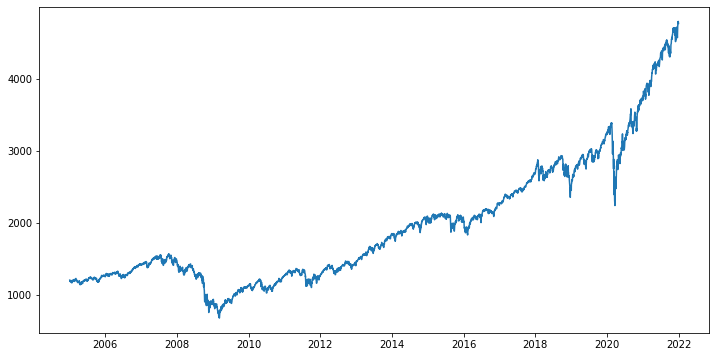

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(stock.index ,stock['Close'])

> Looks pretty close, some parts are a bit more exagerated, but it might just be the scaling

### First thing to do is calculating the daily return %

In [7]:
stock['Return'] = stock['Close'] / stock['Close'].shift(1)
stock.head()

,Open,Close,Return
Date,,,
2005-01-03,1211.92004,1202.07996,NaN
2005-01-04,1202.07996,1188.05005,0.98833
2005-01-05,1188.05005,1183.73999,0.99637
2005-01-06,1183.73999,1187.89001,1.00351
2005-01-07,1187.89001,1186.18994,0.99857


> so if `Return` > 1, then it means that it had a positive return for that day, if `Return` < 1 then it had a negative

### Before getting onto the Moving Average Strategy, lets get the `baseline` first 
> We will see if you had just put in the starting ammount (no trading in between) what we would have ended up with.

In [8]:
stock['Baseline'] = stock['Return'].cumprod() * start_balance
stock.dropna(inplace=True)
stock.head()

,Open,Close,Return,Baseline
Date,,,,
2005-01-04,1202.07996,1188.05005,0.98833,9883.28641
2005-01-05,1188.05005,1183.73999,0.99637,9847.43140
2005-01-06,1183.73999,1187.89001,1.00351,9881.95510
2005-01-07,1187.89001,1186.18994,0.99857,9867.81233
2005-01-10,1186.18994,1190.25000,1.00342,9901.58761


### Seeing how off our baseline is compared to what it should be

In [9]:
print('Original Change:',round(stock['Close'][-1]/ stock['Open'][0], 3))
print('Baseline Change:',round(stock['Baseline'][-1] / stock['Baseline'][0],3))

Original Change: 3.965
Baseline Change: 4.012


> They both seem to have gone up by 373% and is only off by .1%, so this is pretty close and we can attribute the .1% to rounding error

### Calculating the Drawdown (the biggest drop from highest to lowest price)

In [10]:
stock['Base_Peak'] = stock['Baseline'].cummax()
stock['Base_DD'] = stock['Baseline'] - stock['Base_Peak']
stock.head()

,Open,Close,Return,Baseline,Base_Peak,Base_DD
Date,,,,,,
2005-01-04,1202.07996,1188.05005,0.98833,9883.28641,9883.28641,0.00000
2005-01-05,1188.05005,1183.73999,0.99637,9847.43140,9883.28641,-35.85501
2005-01-06,1183.73999,1187.89001,1.00351,9881.95510,9883.28641,-1.33131
2005-01-07,1187.89001,1186.18994,0.99857,9867.81233,9883.28641,-15.47407
2005-01-10,1186.18994,1190.25000,1.00342,9901.58761,9901.58761,0.00000


### Calculating Metrics Now

In [11]:
return_metric = round((stock['Baseline'][-1] / stock['Baseline'][0] - 1) * 100,3)
cagr_metric = round((((stock['Baseline'][-1] / stock['Baseline'][0]) ** (1/years)) - 1) * 100, 3)
dd_metric = round(((stock['Base_DD'] / stock['Base_Peak']).min() * 100), 3)

print('Return Metric:', return_metric)
print('Compound Annual Growth Rate', cagr_metric)
print(f'Biggest Drawdown was: {dd_metric} percent')

Return Metric: 301.177
Compound Annual Growth Rate 8.515
Biggest Drawdown was: -56.775 percent


> The drawdown of 56.78% is from the 2008 market crash.

### Adding in the Simple Moving Average (over 30 days as specified above, but can be changed)

In [12]:
stock['SMA'] = stock['Close'].rolling(window=period).mean()
stock.tail()

,Open,Close,Return,Baseline,Base_Peak,Base_DD,SMA
Date,,,,,,,
2021-12-27,4733.99023,4791.18994,1.01384,39857.49797,39857.49797,0.00000,4366.10954
2021-12-28,4795.49023,4786.35010,0.99899,39817.23573,39857.49797,-40.26224,4370.19660
2021-12-29,4788.64014,4793.06006,1.00140,39873.05532,39873.05532,0.00000,4374.34835
2021-12-30,4794.22998,4778.72998,0.99701,39753.84463,39873.05532,-119.21069,4378.37140
2021-12-31,4775.20996,4766.18018,0.99737,39649.44388,39873.05532,-223.61144,4382.62500


### Getting the Visual now

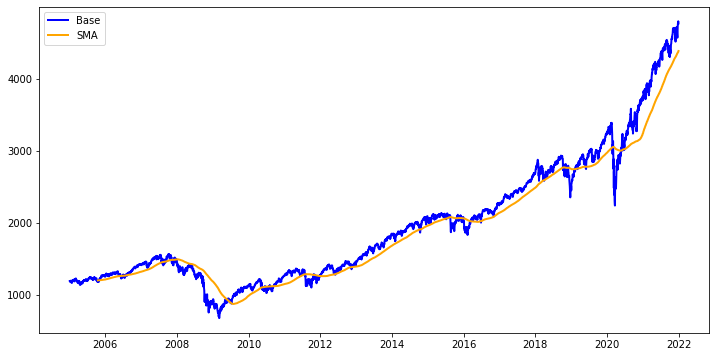

In [13]:
plt.figure(figsize=(12,6))
plt.plot(stock['Close'], 'blue', linewidth = 2, label = 'Base')
plt.plot(stock['SMA'], 'orange', linewidth = 2, label = 'SMA')
plt.legend()
plt.show()

## Now we will actually start geting into implementing the Moving Average Strategy
**Basic Rules**
1. When the price crosses **below** the SMA, we **sell**
2. When the price crosses **above** the SMA, we **buy**

### Creating markers to let us know when to buy or sell

In [14]:
stock['Buy'] = (stock['Close'] > stock['SMA']) * 1

stock.iloc[31:41] 

,Open,Close,Return,Baseline,Base_Peak,Base_DD,SMA,Buy
Date,,,,,,,,
2005-02-17,1210.33997,1200.75000,0.99208,9988.93621,10068.71431,-79.77810,NaN,0
2005-02-18,1200.75000,1201.58997,1.00070,9995.92381,10068.71431,-72.79050,NaN,0
2005-02-22,1201.58997,1184.16003,0.98549,9850.92571,10068.71431,-217.78860,NaN,0
2005-02-23,1184.16003,1190.80005,1.00561,9906.16342,10068.71431,-162.55089,NaN,0
2005-02-24,1190.80005,1200.19995,1.00789,9984.36040,10068.71431,-84.35391,NaN,0
2005-02-25,1200.19995,1211.37000,1.00931,10077.28304,10077.28304,0.00000,NaN,0
2005-02-28,1211.37000,1203.59998,0.99359,10012.64491,10077.28304,-64.63813,NaN,0
2005-03-01,1203.59998,1210.41003,1.00566,10069.29721,10077.28304,-7.98583,NaN,0
2005-03-02,1210.41003,1210.07996,0.99973,10066.55131,10077.28304,-10.73172,NaN,0


### Creating a new Return system where if we don't have share, the return will just be 1 (amount we had before)

In [15]:
stock['Updated_Return'] = np.where(stock['Buy'].shift(1) == 1, stock['Return'], 1.0)
stock.dropna(inplace = True)
stock

,Open,Close,Return,Baseline,Base_Peak,Base_DD,SMA,Buy,Updated_Return
Date,,,,,,,,,
2005-10-18,1190.09998,1178.14001,0.98995,9800.84568,10357.38124,-556.53556,1199.03360,0,1.00000
2005-10-19,1178.14001,1195.76001,1.01496,9947.42491,10357.38124,-409.95633,1199.07215,0,1.00000
2005-10-20,1195.76001,1177.80005,0.98498,9798.01754,10357.38124,-559.36371,1199.04245,0,1.00000
2005-10-21,1177.80005,1179.58997,1.00152,9812.90770,10357.38124,-544.47354,1199.00095,0,1.00000
2005-10-24,1179.58997,1199.38000,1.01678,9977.53934,10357.38124,-379.84191,1199.06690,1,1.00000
...,...,...,...,...,...,...,...,...,...
2021-12-27,4733.99023,4791.18994,1.01384,39857.49797,39857.49797,0.00000,4366.10954,1,1.01384
2021-12-28,4795.49023,4786.35010,0.99899,39817.23573,39857.49797,-40.26224,4370.19660,1,0.99899
2021-12-29,4788.64014,4793.06006,1.00140,39873.05532,39873.05532,0.00000,4374.34835,1,1.00140


### Now we will actually calculate the Moving Average Strategy

In [16]:
stock['SMA_Strat'] = stock['Updated_Return'].cumprod() * start_balance
stock.tail()

,Open,Close,Return,Baseline,Base_Peak,Base_DD,SMA,Buy,Updated_Return,SMA_Strat
Date,,,,,,,,,,
2021-12-27,4733.99023,4791.18994,1.01384,39857.49797,39857.49797,0.00000,4366.10954,1,1.01384,27411.01001
2021-12-28,4795.49023,4786.35010,0.99899,39817.23573,39857.49797,-40.26224,4370.19660,1,0.99899,27383.32065
2021-12-29,4788.64014,4793.06006,1.00140,39873.05532,39873.05532,0.00000,4374.34835,1,1.00140,27421.70919
2021-12-30,4794.22998,4778.72998,0.99701,39753.84463,39873.05532,-119.21069,4378.37140,1,0.99701,27339.72498
2021-12-31,4775.20996,4766.18018,0.99737,39649.44388,39873.05532,-223.61144,4382.62500,1,0.99737,27267.92594


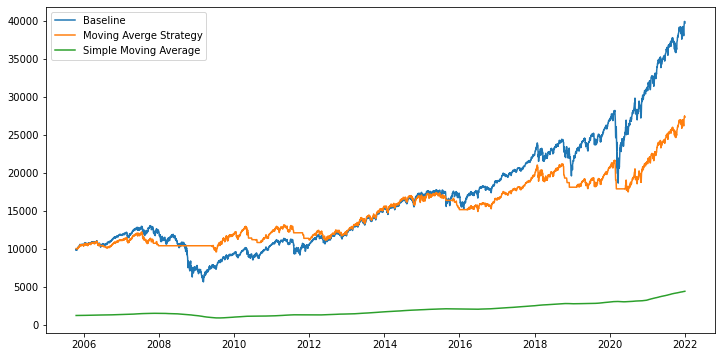

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(stock['Baseline'], label = 'Baseline')
plt.plot(stock['SMA_Strat'], label = 'Moving Averge Strategy')
plt.plot(stock['SMA'], label = 'Simple Moving Average')
plt.legend()
plt.show()

> Hmmm so following the Moving Average Strategy, the end result was a lot worse, while we still came up positive from what we started with, the **baseline** (if we just help the entire time) was `39649.443`   
> while the **Moving Average Strategy** gave us only `16828.002`

### Time to check the metrics though and compare the two! 
Recap of the baseline metrics

In [18]:
# getting the drawdown of the SMA_Strat
stock['MA_Peak'] = stock['SMA_Strat'].cummax()
stock['MA_DD'] = stock['SMA_Strat'] - stock['MA_Peak']

In [19]:
ma_return_metric = round((stock['SMA_Strat'][-1] / stock['SMA_Strat'][0] - 1) * 100,3)
ma_cagr_metric = round((((stock['SMA_Strat'][-1] / stock['SMA_Strat'][0]) ** (1/years)) - 1) * 100, 3)
ma_dd_metric = round(((stock['MA_DD'] / stock['MA_Peak']).min() * 100), 3)

print('Baseline')
print(f'Return Metric: {return_metric}%')
print('Compound Annual Growth Rate', cagr_metric)
print(f'Biggest Drawdown was: {dd_metric}%')
print('---' * 15)
print('Moving Average Strategy')
print(f'Return Metric: {ma_return_metric}%')
print('Compound Annual Growth Rate', ma_cagr_metric)
print(f'Biggest Drawdown was: {ma_dd_metric}%')

Baseline
Return Metric: 301.177%
Compound Annual Growth Rate 8.515
Biggest Drawdown was: -56.775%
---------------------------------------------
Moving Average Strategy
Return Metric: 172.679%
Compound Annual Growth Rate 6.079
Biggest Drawdown was: -21.307%
